<a href="https://colab.research.google.com/github/khaichiong/meco7312/blob/master/L12_Bootstrap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bootstrapping as a tool to obtain the sampling distribution of a statistic

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

## Generate data

In [64]:
n = 1000 #sample size
ld = 0.5 #rate parameter
x = np.random.exponential(1/ld,(n,)) #this is our sample

## Bootstrapping

In [65]:
B = 10000 #number of bootstrapped samples
Bs = []
for b in range(0,B):
  Bs.append(np.random.choice(x,n,replace=True))


In [66]:
#Bs stores all the bootstrapped samples
Bs = np.asarray(Bs)
Bs.shape
Bs = Bs.transpose()
Bs.shape

(1000, 10000)

## Compute bootstrapped statistic

In [67]:
def svar(X):
  return np.var(X)

In [68]:
#compute statistic on each column using list comprehension
t_boostrapped = [svar(Bs[:,i]) for i in range(0,B)]

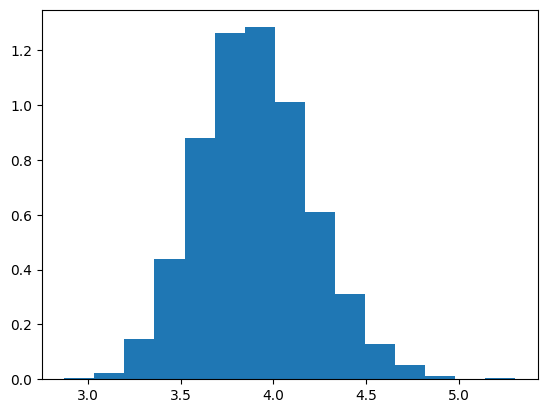

In [69]:
plt.hist(t_boostrapped,bins = 15,density=True)
plt.show()

## Compare with actual sampling distribution

In [70]:
s = 10000 #number of monte carlo experiments
x_mc = np.random.exponential(1/ld,(n,s))

In [71]:
t_mc = [svar(x_mc[:,i]) for i in range(0,s)]

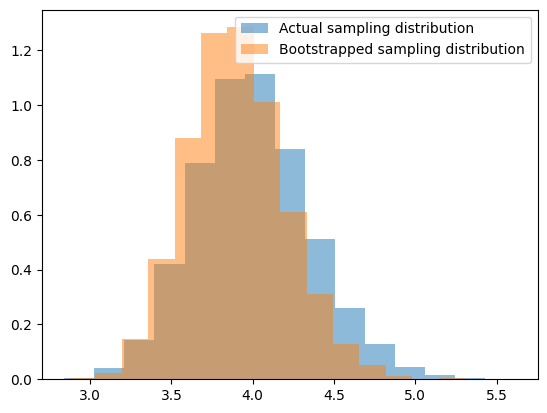

In [72]:
plt.hist(t_mc,bins = 15,density=True, alpha=0.5,label="Actual sampling distribution")
plt.hist(t_boostrapped,bins = 15,density=True, alpha=0.5,label="Bootstrapped sampling distribution")
plt.legend(loc='upper right')
plt.show()

Try different values of sample size and number of bootstraps

# Importance sampling

In [73]:
s = 10000
x = np.random.normal(0,1,(s,))

Calculate $P(X>4)$ using Monte Carlo sampling

In [75]:
np.mean(x>4)

0.0

Using importance sampling, let $g(x) \sim N(4,2)$

In [80]:
x_imp = np.random.normal(4,2,(s,))

In [81]:
#importance weight
w = norm.pdf(x_imp,loc=0,scale=1)/norm.pdf(x_imp,loc=4,scale=np.sqrt(2))

In [82]:
1*(x_imp>4)*w

array([4.95895675e-13, 0.00000000e+00, 0.00000000e+00, ...,
       1.95561048e-05, 3.66003808e-15, 7.63822797e-06])

Monte carlo approximation of P(X>4) with importance sampling

In [85]:
np.mean(1*(x_imp>4)*w)

2.181354470941453e-05

compare with the actual probability

In [84]:
1-norm.cdf(4,loc=0,scale=1)

3.167124183311998e-05

Example 2: $E[X|X\in [a,b]]$

In [175]:
s = 10000
a = 4
b = 4.5
x = np.random.normal(0,1,(s,))

In [176]:
#monte carlo approximation without importance sampling
np.sum(x*((x>a) & (x<b)))/np.sum((x>a) & (x<b))

<ipython-input-176-e202fef33853>:1: RuntimeWarning: invalid value encountered in double_scalars
  np.sum(x*((x>a) & (x<b)))/np.sum((x>a) & (x<b))


nan

In [177]:
#using importance sampling, draw from U[a,b]
x_imp = np.random.uniform(a,b,(s,))

In [178]:
#compute importance weights
f = norm.pdf(x_imp,loc=0,scale=1)/(norm.cdf(b,loc=0,scale=1) - norm.cdf(a,loc=0,scale=1))
g = 1/(b-a)
w = f/g

In [179]:
#monte carlo approximation with importance sampling
np.mean(w*x_imp)

4.13865116628857

In [181]:
#without importance sampling, we would only get accurate results when using many times the samples
s = 1000000
a = 4
b = 4.5
x = np.random.normal(0,1,(s,))
np.sum(x*((x>a) & (x<b)))/np.sum((x>a) & (x<b))

4.2009832247802485